In [7]:
import pandas as pd
import urllib.request
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [11]:
# Load the TF-IDF data from CSV files
X_train = pd.read_csv('train_tfidf.csv')
X_test = pd.read_csv('test_tfidf.csv')

X_train.drop(X_train.columns[0], axis=1, inplace=True)
X_test.drop(X_test.columns[0], axis=1, inplace=True)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Loading the labels
pd_train = pd.read_csv('train_labels.csv').values.ravel()
pd_test = pd.read_csv('test_labels.csv').values.ravel()

pd_train = list(pd_train)
pd_test = list(pd_test)

y_train = [1 if x == "non-suicide" else 0 for x in pd_train]
y_test = [1 if x == "non-suicide" else 0 for x in pd_test]
y_train = np.array(y_train)
y_test = np.array(y_test)

In [4]:
# Create the MLPClassifier with two hidden layers
clf_two_hidden = MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42, early_stopping=True, max_iter=100)
clf_two_hidden.fit(X_train, y_train)
y_pred_two_hidden = clf_two_hidden.predict(X_test)
accuracy_two_hidden = accuracy_score(y_test, y_pred_two_hidden)
print(f"Accuracy of NN with 2 hidden layers: {accuracy_two_hidden}")

Accuracy of NN with 2 hidden layers: 0.9150666666666667


In [5]:
# Create the MLPClassifier with two hidden layers
clf_three_hidden = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, early_stopping=True, max_iter=100)
clf_three_hidden.fit(X_train, y_train)
y_pred_three_hidden = clf_three_hidden.predict(X_test)
accuracy_three_hidden = accuracy_score(y_test, y_pred_three_hidden)
print(f"Accuracy of NN with 2 hidden layers: {accuracy_three_hidden}")

Accuracy of NN with 2 hidden layers: 0.9081333333333333


In [16]:
param_grid = {
    'batch_size': [32, 64, 128],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(clf_two_hidden, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True,
                                     hidden_layer_sizes=(128, 64), max_iter=100,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [17]:
best_params = grid_search.best_params_
best_params

{'batch_size': 32, 'learning_rate_init': 0.001}

In [6]:
# Create the MLPClassifier with two hidden layers
clf_two_hidden_best = MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42, early_stopping=True, max_iter=100, batch_size = 32, learning_rate_init = 0.001)
clf_two_hidden_best.fit(X_train, y_train)
y_pred_two_hidden_best = clf_two_hidden.predict(X_test)
accuracy_two_hidden_best = accuracy_score(y_test, y_pred_two_hidden_best)
print(f"Accuracy of NN with 2 hidden layers: {accuracy_two_hidden_best}")

Accuracy of NN with 2 hidden layers: 0.9150666666666667


In [21]:
grid_search_three_layers = GridSearchCV(clf_three_hidden, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_three_layers.fit(X_train, y_train)
grid_search_three_layers.best_params_

{'batch_size': 64, 'learning_rate_init': 0.001}

In [7]:
# Create the MLPClassifier with two hidden layers
clf_three_hidden_best = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, early_stopping=True, max_iter=100, batch_size = 64, learning_rate_init = 0.001)
clf_three_hidden_best.fit(X_train, y_train)
y_pred_three_hidden_best = clf_three_hidden_best.predict(X_test)
accuracy_three_hidden_best = accuracy_score(y_test, y_pred_three_hidden_best)
print(f"Accuracy of NN with 3 hidden layers: {accuracy_three_hidden_best}")

Accuracy of NN with 3 hidden layers: 0.9145333333333333


## Trying different activation functions

In [3]:
# Create the MLPClassifier with two hidden layers
clf_identity = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, early_stopping=True, max_iter=100, activation='identity', batch_size = 64, learning_rate_init = 0.001)
clf_identity.fit(X_train, y_train)
y_pred_identity = clf_identity.predict(X_test)
accuracy_identity = accuracy_score(y_test, y_pred_identity)
print(f"Accuracy of NN with 3 hidden layers: {accuracy_identity}")

Accuracy of NN with 3 hidden layers: 0.9136


In [10]:
# Create the MLPClassifier with two hidden layers
clf_logistic = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, early_stopping=True, max_iter=100, activation='logistic', batch_size = 64, learning_rate_init = 0.001)
clf_logistic.fit(X_train, y_train)
y_pred_logistic = clf_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy of NN with 3 hidden layers: {accuracy_logistic}")

Accuracy of NN with 3 hidden layers: 0.9136


In [11]:
# Create the MLPClassifier with two hidden layers
clf_tanh = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, early_stopping=True, max_iter=100, activation='tanh', batch_size = 64, learning_rate_init = 0.001)
clf_tanh.fit(X_train, y_train)
y_pred_tanh = clf_logistic.predict(X_test)
accuracy_tanh = accuracy_score(y_test, y_pred_tanh)
print(f"Accuracy of NN with 3 hidden layers: {accuracy_tanh}")

Accuracy of NN with 3 hidden layers: 0.9136


In [12]:
accuracy_score(y_train, clf_tanh.predict(X_train))

0.9298222222222222

In [13]:
# mlp 3 layer w logistic post hyper param tuning 
clf_logistic_ = MLPClassifier(hidden_layer_sizes=(128), random_state=42, early_stopping=True, max_iter=100, activation='tanh', batch_size = 32, learning_rate_init = 0.001)
clf_logistic_.fit(X_train, y_train)
y_pred_logistic_ = clf_logistic_.predict(X_test)
accuracy_logistic_ = accuracy_score(y_test, y_pred_logistic_)
print(f"Accuracy of NN with 3 hidden layers: {accuracy_logistic_}")

Accuracy of NN with 3 hidden layers: 0.9152


In [29]:
grid_search_logistic = GridSearchCV(clf_logistic, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='logistic', batch_size=64,
                                     early_stopping=True,
                                     hidden_layer_sizes=(128, 64, 32),
                                     max_iter=100, random_state=42),
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [30]:
grid_search_logistic.best_params_

{'batch_size': 32, 'learning_rate_init': 0.001}

In [14]:
# Create the MLPClassifier with two hidden layers
clf_logistic_ = MLPClassifier(hidden_layer_sizes=(128), random_state=42, early_stopping=True, max_iter=100, activation='logistic')
clf_logistic_.fit(X_train, y_train)
y_pred_logistic_ = clf_logistic_.predict(X_test)
accuracy_logistic_ = accuracy_score(y_test, y_pred_logistic_)
print(f"Accuracy of NN with 3 hidden layers: {accuracy_logistic_}")

Accuracy of NN with 3 hidden layers: 0.9134666666666666


In [15]:
clf_ = MLPClassifier(early_stopping=True)
clf_.fit(X_train, y_train)
y_ = clf_.predict(X_test)
accuracy_ = accuracy_score(y_test, y_)
print(f"Accuracy of base nn: {accuracy_}")

Accuracy of base nn: 0.9144


## Plots

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print the shapes to verify the split
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training data shape: (20250, 1000)
Validation data shape: (2250, 1000)
Training labels shape: (20250,)
Validation labels shape: (2250,)


In [13]:
X_test.shape

(7500, 1000)

In [15]:
early_stopping = True

Early Stopping at Epoch:  47
Accuracy of NN with 2 hidden layers (identity): 0.876


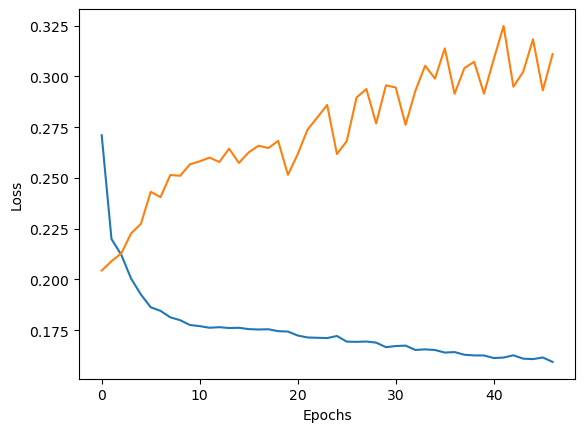

In [21]:
clf_identity = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, max_iter=100, activation='identity', batch_size = 64, learning_rate_init = 0.001)
train_loss_identity = []
val_loss_identity = []

# Partial Fitting the model to get the Val Loss vs Epochs curve
for epoch in range(100):
    clf_identity.partial_fit(X_train, y_train, classes = np.unique(y_train))

    # Calculating Training Loss
    t_loss = clf_identity.loss_
    train_loss_identity.append(t_loss)

    # Calculating Validation Loss
    v_loss = log_loss(y_val, clf_identity.predict_proba(X_val))
    val_loss_identity.append(v_loss)

    if early_stopping:
        if epoch > 45:
            if val_loss_identity[-1] > np.mean(val_loss_identity[-4:]):
                print("Early Stopping at Epoch: ", epoch+1)
                break
            else:
                if np.mean(val_loss_identity[-4:]) - val_loss_identity[-1] < 1e-4:
                    print("Early Stopping at Epoch: ", epoch+1)
                    break

y_pred_two_hidden_best_identity = clf_identity.predict(X_test)
accuracy_two_hidden_best_identity = accuracy_score(y_test, y_pred_two_hidden_best_identity)

print(f"Accuracy of NN with 2 hidden layers (identity): {accuracy_two_hidden_best_identity}")
plt.plot(train_loss_identity, label='Training Loss')
plt.plot(val_loss_identity, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.savefig('MLP_Identity')
plt.show()

Early Stopping at Epoch:  47
Accuracy of NN with 2 hidden layers (logistic): 0.9134666666666666


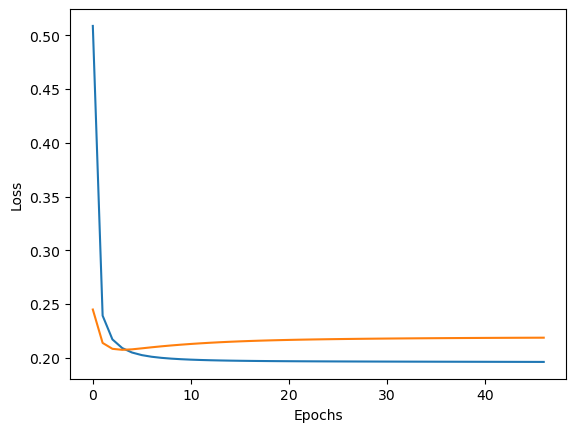

In [20]:
clf_logistic = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, max_iter=100, activation='logistic', batch_size = 64, learning_rate_init = 0.001)
train_loss_logistic = []
val_loss_logistic = []

# Partial Fitting the model to get the Val Loss vs Epochs curve
for epoch in range(100):
    clf_logistic.partial_fit(X_train, y_train, classes = np.unique(y_train))

    # Calculating Training Loss
    t_loss = clf_logistic.loss_
    train_loss_logistic.append(t_loss)

    # Calculating Validation Loss
    v_loss = log_loss(y_val, clf_logistic.predict_proba(X_val))
    val_loss_logistic.append(v_loss)

    if early_stopping:
        if epoch > 45:
            if val_loss_logistic[-1] > np.mean(val_loss_logistic[-4:]):
                print("Early Stopping at Epoch: ", epoch+1)
                break
            else:
                if np.mean(val_loss_logistic[-4:]) - val_loss_logistic[-1] < 1e-4:
                    print("Early Stopping at Epoch: ", epoch+1)
                    break

y_pred_two_hidden_best_logistic = clf_logistic.predict(X_test)
accuracy_two_hidden_best_logistic = accuracy_score(y_test, y_pred_two_hidden_best_logistic)

print(f"Accuracy of NN with 2 hidden layers (logistic): {accuracy_two_hidden_best_logistic}")
plt.plot(train_loss_logistic, label='Training Loss')
plt.plot(val_loss_logistic, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.savefig('MLP_Logistic')
plt.show()

Early Stopping at Epoch:  4
Accuracy of NN with 2 hidden layers (tanh): 0.9058666666666667


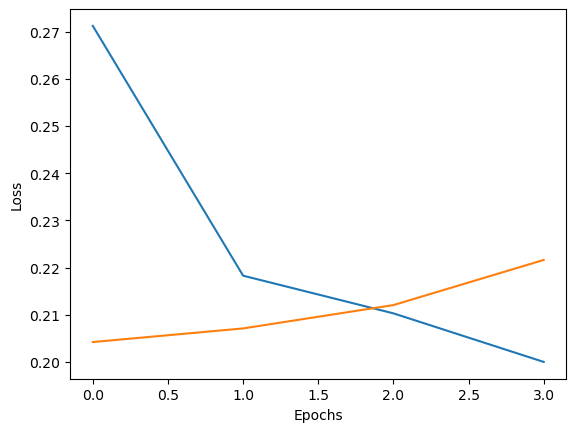

In [29]:
clf_tanh = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, max_iter=100, activation='tanh', batch_size = 64, learning_rate_init = 0.001)
train_loss_tanh = []
val_loss_tanh = []

# Partial Fitting the model to get the Val Loss vs Epochs curve
for epoch in range(100):
    clf_tanh.partial_fit(X_train, y_train, classes = np.unique(y_train))

    # Calculating Training Loss
    t_loss = clf_tanh.loss_
    train_loss_tanh.append(t_loss)

    # Calculating Validation Loss
    v_loss = log_loss(y_val, clf_tanh.predict_proba(X_val))
    val_loss_tanh.append(v_loss)

    if early_stopping:
        if epoch > 2:
            if val_loss_tanh[-1] > np.mean(val_loss_tanh[-4:]):
                print("Early Stopping at Epoch: ", epoch+1)
                break
            else:
                if np.mean(val_loss_tanh[-4:]) - val_loss_tanh[-1] < 1e-4:
                    print("Early Stopping at Epoch: ", epoch+1)
                    break

y_pred_two_hidden_best_tanh = clf_tanh.predict(X_test)
accuracy_two_hidden_best_tanh = accuracy_score(y_test, y_pred_two_hidden_best_tanh)

print(f"Accuracy of NN with 2 hidden layers (tanh): {accuracy_two_hidden_best_tanh}")
plt.plot(train_loss_tanh, label='Training Loss')
plt.plot(val_loss_tanh, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.savefig('MLP_Tanh')
plt.show()

Early Stopping at Epoch:  47
Accuracy of NN with 2 hidden layers (tanh): 0.9116


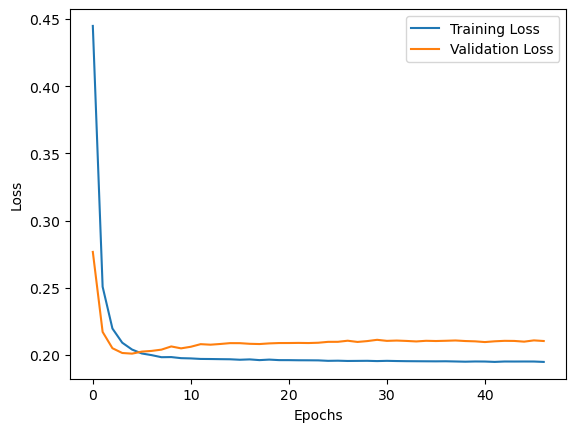

In [32]:
clf_tanh = MLPClassifier(activation='tanh')
train_loss_tanh = []
val_loss_tanh = []

# Partial Fitting the model to get the Val Loss vs Epochs curve
for epoch in range(100):
    clf_tanh.partial_fit(X_train, y_train, classes = np.unique(y_train))

    # Calculating Training Loss
    t_loss = clf_tanh.loss_
    train_loss_tanh.append(t_loss)

    # Calculating Validation Loss
    v_loss = log_loss(y_val, clf_tanh.predict_proba(X_val))
    val_loss_tanh.append(v_loss)

    if early_stopping:
        if epoch > 45:
            if val_loss_tanh[-1] > np.mean(val_loss_tanh[-4:]):
                print("Early Stopping at Epoch: ", epoch+1)
                break
            else:
                if np.mean(val_loss_tanh[-4:]) - val_loss_tanh[-1] < 1e-4:
                    print("Early Stopping at Epoch: ", epoch+1)
                    break

y_pred_two_hidden_best_tanh = clf_tanh.predict(X_test)
accuracy_two_hidden_best_tanh = accuracy_score(y_test, y_pred_two_hidden_best_tanh)

print(f"Accuracy of NN with 2 hidden layers (tanh): {accuracy_two_hidden_best_tanh}")
plt.plot(train_loss_tanh, label='Training Loss')
plt.plot(val_loss_tanh, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('MLP_Tanh')
plt.show()

Early Stopping at Epoch:  47
Accuracy of NN with 2 hidden layers (identity): 0.9121333333333334


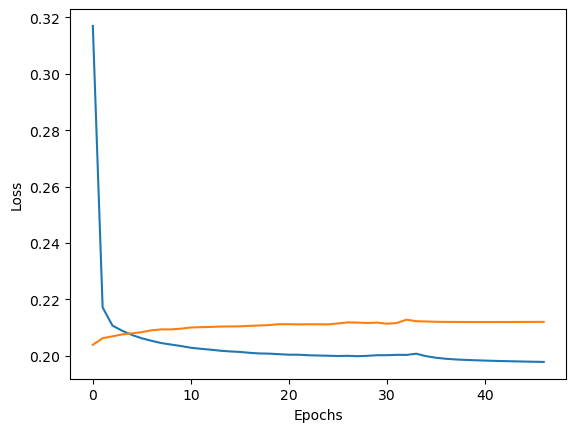

In [36]:
clf_identity = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, max_iter=100, activation='identity')
train_loss_identity = []
val_loss_identity = []

# Partial Fitting the model to get the Val Loss vs Epochs curve
for epoch in range(100):
    clf_identity.partial_fit(X_train, y_train, classes = np.unique(y_train))

    # Calculating Training Loss
    t_loss = clf_identity.loss_
    train_loss_identity.append(t_loss)

    # Calculating Validation Loss
    v_loss = log_loss(y_val, clf_identity.predict_proba(X_val))
    val_loss_identity.append(v_loss)

    if early_stopping:
        if epoch > 45:
            if val_loss_identity[-1] > np.mean(val_loss_identity[-4:]):
                print("Early Stopping at Epoch: ", epoch+1)
                break
            else:
                if np.mean(val_loss_identity[-4:]) - val_loss_identity[-1] < 1e-4:
                    print("Early Stopping at Epoch: ", epoch+1)
                    break

y_pred_two_hidden_best_identity = clf_identity.predict(X_test)
accuracy_two_hidden_best_identity = accuracy_score(y_test, y_pred_two_hidden_best_identity)

print(f"Accuracy of NN with 2 hidden layers (identity): {accuracy_two_hidden_best_identity}")
plt.plot(train_loss_identity, label='Training Loss')
plt.plot(val_loss_identity, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.savefig('MLP_Identity')
plt.show()

In [38]:
param_grid = {
    'batch_size': [32, 64, 128],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search1 = GridSearchCV(clf_identity, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search1.fit(X_train, y_train)

/Users/medhahira/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/medhahira/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/medhahira/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='identity',
                                     hidden_layer_sizes=(128, 64, 32),
                                     max_iter=100, random_state=42),
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [40]:
grid_search1.best_params_

{'batch_size': 128, 'learning_rate_init': 0.1}

Early Stopping at Epoch:  50
Accuracy of NN with 2 hidden layers (identity): 0.8926666666666667


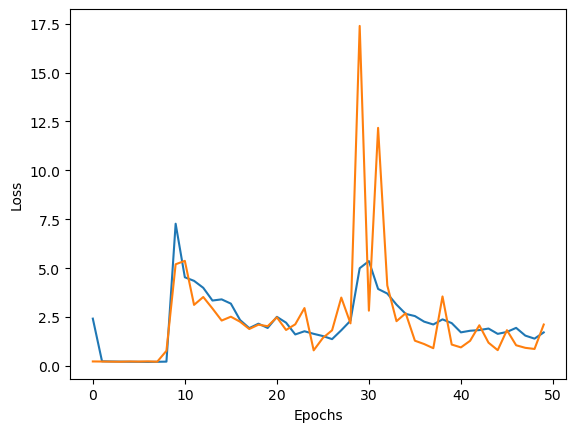

In [41]:
clf_identity = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=42, max_iter=100, activation='identity', batch_size = 128, learning_rate_init = 0.1)
train_loss_identity = []
val_loss_identity = []

# Partial Fitting the model to get the Val Loss vs Epochs curve
for epoch in range(100):
    clf_identity.partial_fit(X_train, y_train, classes = np.unique(y_train))

    # Calculating Training Loss
    t_loss = clf_identity.loss_
    train_loss_identity.append(t_loss)

    # Calculating Validation Loss
    v_loss = log_loss(y_val, clf_identity.predict_proba(X_val))
    val_loss_identity.append(v_loss)

    if early_stopping:
        if epoch > 45:
            if val_loss_identity[-1] > np.mean(val_loss_identity[-4:]):
                print("Early Stopping at Epoch: ", epoch+1)
                break
            else:
                if np.mean(val_loss_identity[-4:]) - val_loss_identity[-1] < 1e-4:
                    print("Early Stopping at Epoch: ", epoch+1)
                    break

y_pred_two_hidden_best_identity = clf_identity.predict(X_test)
accuracy_two_hidden_best_identity = accuracy_score(y_test, y_pred_two_hidden_best_identity)

print(f"Accuracy of NN with 2 hidden layers (identity): {accuracy_two_hidden_best_identity}")
plt.plot(train_loss_identity, label='Training Loss')
plt.plot(val_loss_identity, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend
plt.savefig('MLP_Identity')
plt.show()